In [43]:
%run main.ipynb

Null counts for 2019:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2019                 0
dtype: int64

Null counts for 2020:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2020                 0
dtype: int64

Null counts for 2021:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2021                 0
dtype: int64

Null counts for 2022:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2022                 0
dtype: int64

Null counts for 2023:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Catego

In [44]:
# df_list contains the names of DataFrames
df_list = ['budget2019_df', 'budget2020_df', 'budget2021_df', 'budget2022_df', 'budget2023_df']

new_df = []  # Empty list to store the renamed dataframe

for i, df_name in enumerate(df_list):
    year = 2019 + i
    old_column_name = f'Budgeted amount {year}'  # Old column name

    # Get the actual DataFrame from the list
    df = globals()[df_name].copy()

    # Rename the column in the copy of the DataFrame
    df.rename(columns={old_column_name: 'Budgeted amount'}, inplace=True)

    # Append the modified DataFrame to new_df
    new_df.append(df)

# Concatenate the DataFrames in the list into a single DataFrame
renamed_df = pd.concat(new_df, ignore_index=True)

# Convert 'Budgeted amount' to numeric
renamed_df['Budgeted amount'] = pd.to_numeric(renamed_df['Budgeted amount'], errors='coerce')

In [45]:
renamed_expenses = renamed_df[renamed_df['Expense/Revenue']=='Expenses'] #Filtering dataframe for revenues
renamed_expenses

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
0,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Allowances,Benefits To Be Dist,1666.06
1,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,Comprehensive Med,29344.32
2,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,CPP,20187.41
3,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,Dental Plan,14737.61
4,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,EI,8721.89
...,...,...,...,...,...,...,...,...
97855,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Professtional & Consulting,Professional Services - Audit,10000.00
97856,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Professtional & Consulting,Professional Services - Legal,2500.00
97857,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Rentals,Rental Of Office,80000.00
97858,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Telecommnuncation,Telephone,25000.00


In [46]:
#Outliers for expenses
all_outliers_exp = pd.DataFrame() #Creating an empty dataframe to store the outliers
lower_quartiles_exp = renamed_expenses.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.25)) #Calculating the lower quantile
upper_quartiles_exp = renamed_expenses.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.75)) #Calculating the upper quantile
iqr_exp = upper_quartiles_exp - lower_quartiles_exp #Calculating the interquantile range
lower_bound_exp = lower_quartiles_exp - 1.5 * iqr_exp #Calculating the lower bound by using the values from the lower quantiles to find the minimum threshold
upper_bound_exp = upper_quartiles_exp + 1.5 * iqr_exp  #Calculating the lower bound by using the values from the lower quantiles to find the minimum threshold
outliers_exp = renamed_expenses[(renamed_expenses['Budgeted amount'] < lower_bound_exp) | (renamed_expenses['Budgeted amount'] > upper_bound_exp)] #Identifing and filtering outliers in the 'Budgeted amount' column based on the calculated lower and upper bounds for expenses.
all_outliers_exp = pd.concat([all_outliers_exp, outliers_exp], ignore_index=True) #Combining identified outliers from each dataframe and create a final dataframe
# Display the result
all_outliers_exp.sort_values('Budgeted amount', ascending=False)

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
13282,Toronto Transit Commission - Conventional,Toronto Transit Commission - Conventional Service,Not assigned,Expenses,Salaries,Permanent Salaries,Full Time - Regular Pay Sap,1.189747e+09
7653,Toronto Transit Commission - Conventional,Toronto Transit Commission - Conventional Service,Not assigned,Expenses,Salaries,Permanent Salaries,Full Time Reg Py Sap,1.124730e+09
10390,Toronto Transit Commission - Conventional,Toronto Transit Commission - Conventional Service,Not assigned,Expenses,Salaries,Permanent Salaries,Full Time - Regular Pay Sap,1.121098e+09
5009,Toronto Transit Commission - Conventional,Toronto Transit Commission - Conventional Service,Toronto Transit Commission - Conventional Service,Expenses,Salaries And Benefits,Permanent Salaries,Full Time Reg Py Sap,1.120524e+09
4801,Toronto Police Service,Toronto Police Service,Toronto Police Service,Expenses,Salaries And Benefits,Permanent Salaries,Full Time Reg Py Sap,1.086197e+09
...,...,...,...,...,...,...,...,...
9974,Toronto Employment & Social Services,Financial Supports,Financial and employment benefits administration,Expenses,Other Expenditures,Contributions And Transfers,Income Credits,-4.400000e+07
12867,Toronto Employment & Social Services,Financial Supports,Financial and employment benefits administration,Expenses,Other Expenditures,Contributions And Transfers,Income Credits,-4.400000e+07
7292,Toronto Employment & Social Services,Financial Supports,Financial and employment benefits administration,Expenses,Other Expenditures,Contributions And Transfers,Income Credits,-4.400000e+07
4596,Toronto Employment & Social Services,Financial Supports,Financial and employment benefits administration,Expenses,Other Expenditures,Contributions And Transfers,Income Credits,-4.400000e+07


In [47]:
#Calculating the total outliers for each category to see which category has the highest and lowest outliers

# Group by 'Program' and calculate the sum of 'Budgeted amount' for outliers
outliers_sum_by_cat = all_outliers_exp.groupby('Category Name')['Budgeted amount'].sum().reset_index()

# Sort by the sum of outliers in descending order
outliers_sum_by_cat = outliers_sum_by_cat.sort_values('Budgeted amount', ascending=False)

# Display the result
print("Categories with the highest sum of outliers for expenses:")
outliers_sum_by_cat

Categories with the highest sum of outliers for expenses:


,Category Name,Budgeted amount
7,Salaries,1.431609e+10
6,Other Expenditures,1.388068e+10
9,Service And Rent,1.216873e+10
8,Salaries And Benefits,1.150954e+10
2,Contribution To Reserves/Reserve Funds,5.810287e+09
0,Benefits,3.966854e+09
5,Materials & Supplies,3.880899e+09
1,Contribution To Capital,1.710173e+09
4,Inter-Divisional Charges,9.876027e+08
3,Equipment,3.077389e+08


In [48]:
renamed_revenues = renamed_df[renamed_df['Expense/Revenue']=='Revenues'] #Filtering dataframe for revenues
renamed_revenues

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
58,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Revenues,Provincial Subsidies,Provincial Subsidies,Prov Grants/Subs,-756159.2
59,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Cont From Res Fund,-166333.0
118,Affordable Housing Office,Housing Policy & Partnerships,Housing Policy & Partnerships,Revenues,Provincial Subsidies,Provincial Subsidies,Prov Grants/Subs,-759934.2
119,Affordable Housing Office,Housing Policy & Partnerships,Housing Policy & Partnerships,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Cont From Res Fund,-166333.0
178,Affordable Housing Office,New Affordable Housing Development,New Affordable Housing Development,Revenues,Provincial Subsidies,Provincial Subsidies,Prov Grants/Subs,-756163.4
...,...,...,...,...,...,...,...,...
97840,Transportation Services,Transportation Safety & Operations,Transportation Studies & Investigations,Revenues,Transfers From Capital,Transfers From Capital,Transfers From Capital Fund,-3106050.0
97860,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Contributions From Reserves,-33519.0
97861,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,User Fees & Donations,User Fees,"Fees, Service Charges",-836250.0
97862,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,User Fees & Donations,Licences & Permits Revenue,Location Permits,-200000.0


In [49]:
#Outliers for revenues
all_outliers_rev = pd.DataFrame()
renamed_revenues.loc[:,'Budgeted amount'] = pd.to_numeric(renamed_revenues['Budgeted amount'], errors='coerce')
lower_quartiles_rev = renamed_revenues.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.25))
upper_quartiles_rev = renamed_revenues.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.75))
iqr_rev = upper_quartiles_rev - lower_quartiles_rev
lower_bound_rev = lower_quartiles_rev - 1.5 * iqr_rev
upper_bound_rev = upper_quartiles_rev + 1.5 * iqr_rev
outliers_rev = renamed_revenues[(renamed_revenues['Budgeted amount'] < lower_bound_rev) | (renamed_revenues['Budgeted amount'] > upper_bound_rev)]
all_outliers_rev = pd.concat([all_outliers_rev, outliers_rev], ignore_index=True)
all_outliers_rev.sort_values('Budgeted amount', ascending=False)

/var/folders/nh/7vhf8kmd3nbg3k0j8yf9t99r0000gn/T/ipykernel_43980/1133674191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renamed_revenues.loc[:,'Budgeted amount'] = pd.to_numeric(renamed_revenues['Budgeted amount'], errors='coerce')


,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
154,Office of the Controller,"RS-Tax, Utility & Parking Ticket Client Services",RS-Tax / Utility Account Administration,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Water Ser,-7.362441e+05
934,City Clerk's Office,Make Government Work,Corporate Information Production Services,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR - Public Health,-7.380000e+05
360,"Policy, Planning, Finance & Administration",Financial Management,Budget Planning & coordination,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Water Ser,-7.397248e+05
363,"Policy, Planning, Finance & Administration",Program Support,Time & Attendance Data Entry & Reporting,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Solid Waste,-7.471128e+05
274,Corporate Real Estate Management,Facilities Management,Corporate Security,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-SSHA,-7.596122e+05
...,...,...,...,...,...,...,...,...
226,Non-Program Taxation Tax Levy,Corporate Accounts,Corporate Accounts,Revenues,Sundry and Other Revenues,Taxation,Tax Levy,-4.397556e+09
336,Non-Program Taxation Tax Levy,Corporate Accounts,Corporate Accounts,Revenues,Sundry and Other Revenues,Taxation,Tax Levy,-4.556628e+09
550,Non-Program Taxation Tax Levy,Corporate Accounts,Not assigned,Revenues,Other Revenue,Taxation,Tax Levy,-4.671171e+09
769,Non-Program Taxation Tax Levy,Corporate Accounts,Not assigned,Revenues,Other Revenue,Taxation,Tax Levy,-4.878800e+09


In [50]:
#Calculating the total outliers for each category to see which category has the highest and lowest outliers
# Group by 'Program' and calculate the sum of 'Budgeted amount' for outliers
outliers_sum_by_cat_rev = all_outliers_rev.groupby('Category Name')['Budgeted amount'].sum().reset_index()

# Sort by the sum of outliers in descending order
outliers_sum_by_cat_rev = outliers_sum_by_cat_rev.sort_values('Budgeted amount', ascending=True)

# Display the result
print("Categories with the highest sum of outliers for revenue:")
outliers_sum_by_cat_rev

Categories with the highest sum of outliers for revenue:


,Category Name,Budgeted amount
4,Other Revenue,-2.419847e+10
5,Provincial Subsidies,-1.488547e+10
6,Sundry and Other Revenues,-1.483601e+10
8,User Fees & Donations,-1.028703e+10
0,Contribution From Reserves/Reserve Funds,-2.623612e+09
1,Federal Subsidies,-1.867598e+09
2,Inter-Divisional Recoveries,-9.462409e+08
7,Transfers From Capital,-8.131495e+08
3,Licences & Permits Revenue,-2.278913e+08


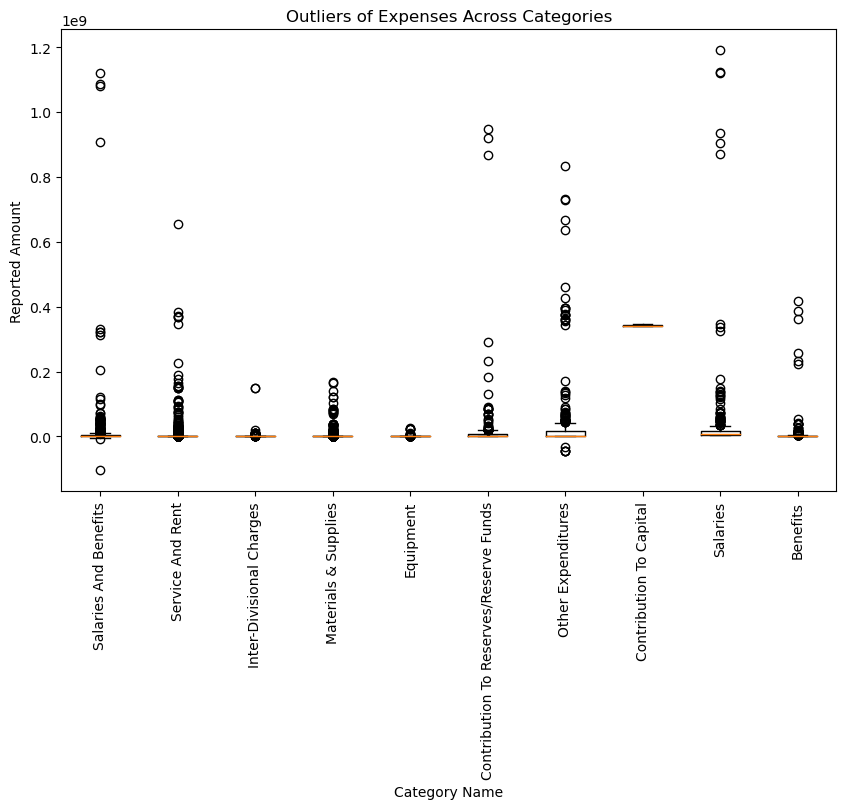

In [51]:
plt.figure(figsize=(10, 6))  #Setting the figure size
# Creating a box plot
plt.boxplot([all_outliers_exp[all_outliers_exp['Category Name'] == category]['Budgeted amount'] for category in all_outliers_exp['Category Name'].unique()])
plt.title('Outliers of Expenses Across Categories') # Setting plot title and labels
plt.xlabel('Category Name')
plt.ylabel('Reported Amount')
#Set x-axis ticks with labels for each unique category in the dataframe, rotated by 90 degrees.
plt.xticks(range(1, len(all_outliers_exp['Category Name'].unique()) + 1), all_outliers_exp['Category Name'].unique(), rotation=90)
plt.savefig("output/outliers/Outliers_of_Expenses_Across_Categories.png")
plt.show()

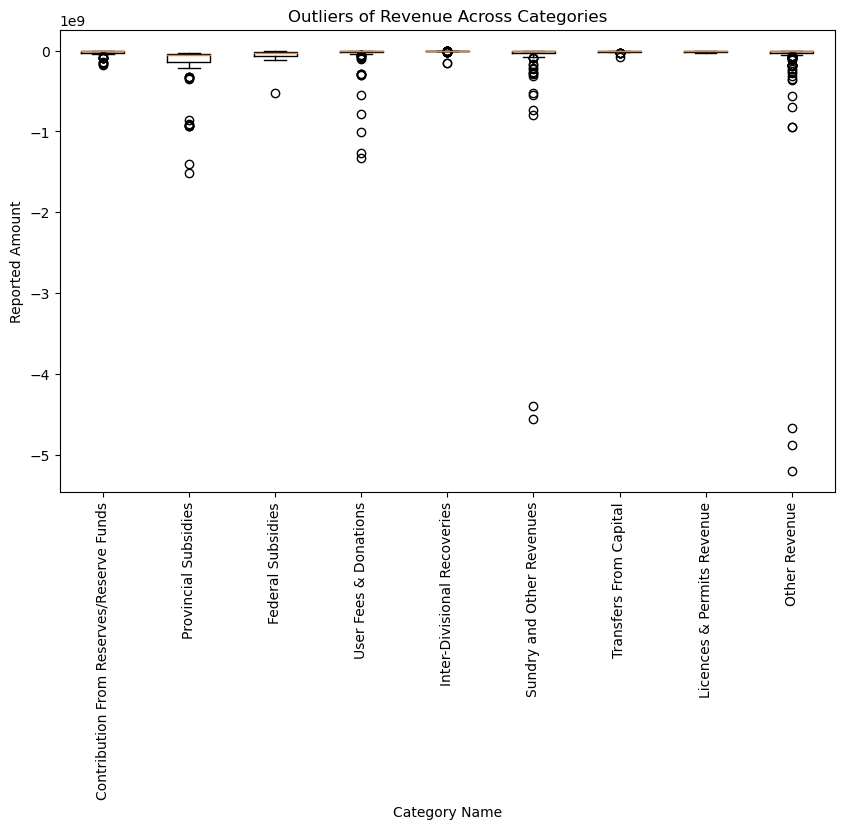

In [52]:
plt.figure(figsize=(10, 6)) #Setting the figure size
# Creating a box plot
plt.boxplot([all_outliers_rev[all_outliers_rev['Category Name'] == category_rev]['Budgeted amount'] for category_rev in all_outliers_rev['Category Name'].unique()])
plt.title('Outliers of Revenue Across Categories') # Setting plot title and labels
plt.xlabel('Category Name')
plt.ylabel('Reported Amount')
#Set x-axis ticks with labels for each unique category in the dataframe, rotated by 90 degrees.
plt.xticks(range(1, len(all_outliers_rev['Category Name'].unique()) + 1), all_outliers_rev['Category Name'].unique(), rotation=90)
plt.savefig("output/outliers/Outliers_of_Revenues_Across_Categories.png")
plt.show()